This a program that attempts to do a sentiment analysis of the book The Name of the Wind by Patrick Ruthfoss. The main features of this program include :

sentiment analysis of each chapter of the book using both textblob and nltk library
sentiment analysis of the ten most important characters in the book
sentiment analysis of the overall character development of any character in the book

In [1]:
import numpy as np
import pandas as pd 
import spacy 
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.corpus import stopwords

#loaded the doc
text = open("tNotW.txt", encoding="utf8") 
text = text.read()

In [2]:
# load spacy
nlp = spacy.load('en_core_web_lg')
nlp.max_length = 2000000 #this is because default length is 1000000

In [3]:
#create object doc with text file loaded through spacy
doc = nlp(text)

In [4]:
# create a list containing all the index marking the ends of a chapter
chap_end = []
for i in range(len(doc)): 
    if doc[i].text == 'CHAPTER':
        chap_end.append(i)

In [5]:
print(len(chap_end))

92


In [6]:
# create a sentiment dictionary using textblob
chap_sentiment = {}
chapter = 0
for c in range(len(chap_end)-1):
    chap_sentiment[str(chapter)] = TextBlob(doc[chap_end[c]:chap_end[c+1]].text).polarity
    chapter +=1

In [7]:
print(chap_sentiment)

{'0': 0.03079105046738978, '1': 0.06130666786916785, '2': 0.004666384496168016, '3': 0.008858930302229276, '4': -0.013060501741057282, '5': 0.03306214121308459, '6': 0.11617710838544171, '7': 0.08946311584636467, '8': 0.11027845520492577, '9': 0.041697988739655384, '10': 0.0886386065625196, '11': 0.08945515778849113, '12': 0.023808779994346965, '13': 0.06180187823499923, '14': 0.20073899816269006, '15': 0.04155557866570727, '16': -0.0006902526268723521, '17': 0.0001708106027958941, '18': -0.009080995873448698, '19': -0.014801318680371595, '20': -0.000541268885639749, '21': 0.015900460756107973, '22': 0.042890605264705985, '23': -0.029330035044320756, '24': 0.04383210180623975, '25': 0.04613895102496785, '26': 0.018622134038800704, '27': 0.04590768108009487, '28': 0.006899641577060933, '29': 0.01247060552616109, '30': 0.06575237386621316, '31': 0.0641540404040404, '32': 0.06945324209840337, '33': 0.08350701257176074, '34': 0.12322316986496089, '35': 0.04893356330150913, '36': 0.05065104

<AxesSubplot:>

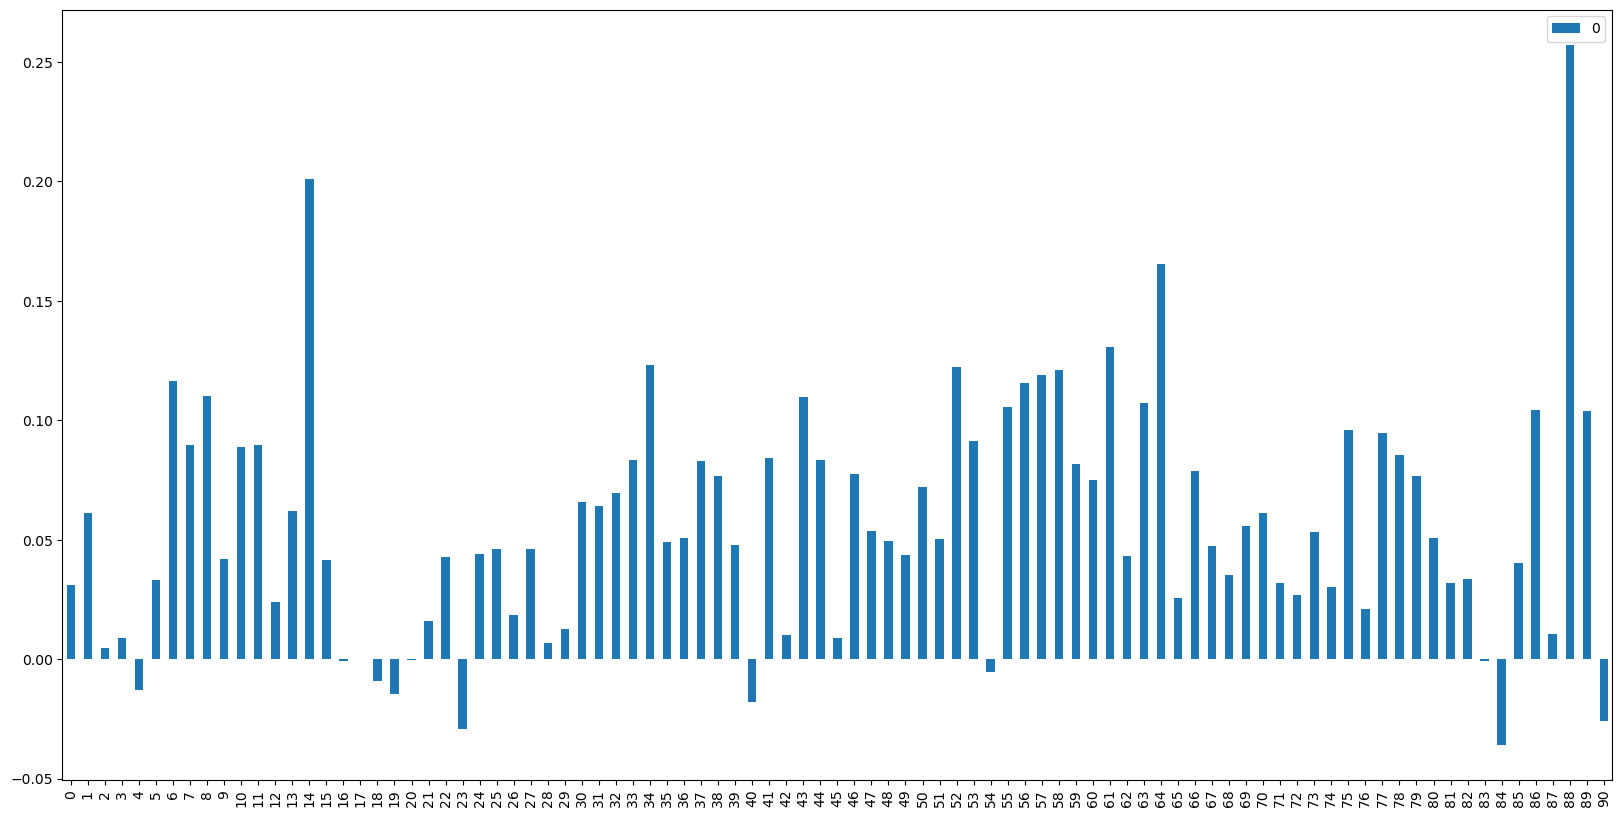

In [8]:
# make a graph of each chapter sentiment

df = pd.DataFrame.from_dict(chap_sentiment, orient = 'index')
df.plot.bar(figsize = (20,10))


In [9]:
# load sentiment analyzer using VADER from NLTK
sid = SentimentIntensityAnalyzer()

In [10]:
# create a dictionary of sentiment usinf sid
chap_sid = {}
chapter = 0
for c in range(len(chap_end)-1):
    tsid = sid.polarity_scores(doc[chap_end[c]:chap_end[c+1]].text)
    chap_sid[str(chapter)] = tsid['compound']
    chapter +=1

In [11]:
print(chap_sid)

{'0': 0.9995, '1': 0.9964, '2': 0.9989, '3': -0.9595, '4': -0.9951, '5': 0.9901, '6': 0.999, '7': 0.9986, '8': 0.9992, '9': 0.9864, '10': 0.9996, '11': 0.9997, '12': -0.9678, '13': 0.9436, '14': 0.9998, '15': 0.9833, '16': -0.9784, '17': -0.9954, '18': 0.9861, '19': -0.9994, '20': -0.9971, '21': -0.9977, '22': -0.9997, '23': -0.6154, '24': -0.9085, '25': -0.9991, '26': -0.9621, '27': 0.999, '28': 0.9426, '29': 0.9951, '30': 0.9988, '31': 0.9993, '32': 0.9993, '33': 0.9871, '34': 0.9979, '35': 0.9997, '36': 0.9997, '37': 0.9995, '38': 0.9997, '39': 0.993, '40': 0.5671, '41': 0.9992, '42': 0.9622, '43': 0.9997, '44': -0.9762, '45': 0.9926, '46': 0.9814, '47': 0.9594, '48': 0.9749, '49': 0.9983, '50': 0.9954, '51': 0.9994, '52': 0.9998, '53': 0.9999, '54': -0.9802, '55': 0.9999, '56': 0.9991, '57': 0.9999, '58': 0.9692, '59': 0.9999, '60': 0.9998, '61': 0.9998, '62': 0.996, '63': 0.9994, '64': 0.9999, '65': -0.951, '66': 0.9874, '67': 0.9998, '68': 0.9994, '69': -0.9349, '70': 0.9999, '71

<AxesSubplot:>

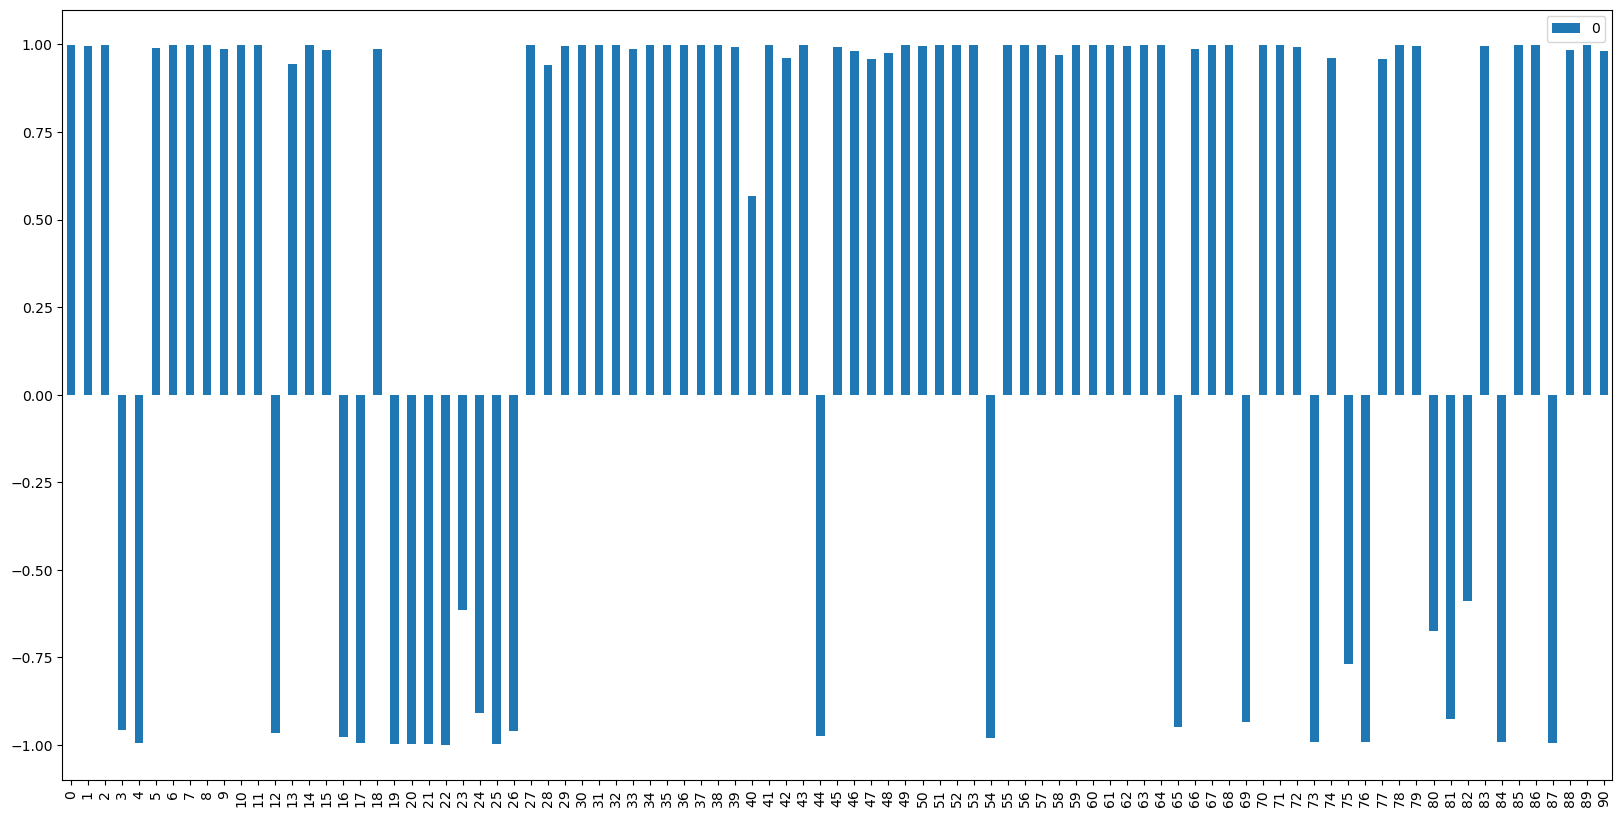

In [12]:
# plot the sid values of each chapter 

df = pd.DataFrame.from_dict(chap_sid, orient = 'index')

df.plot.bar(figsize = (20,10))

In [13]:
# create a function to split text when a double enter is detected
def create_para_list(st):
    return st.split('\n\n')

In [14]:
# seperate the books into different para
para = create_para_list(doc.text)

In [15]:
# create a function to analyze a chacter orientation using polarity on a para 
def char_score_tb(cand, para):
    score = 0
    for p in para:
        ptb = TextBlob(p)
        ptb_c=ptb.polarity

        if cand in p and ptb_c>0.05:
            score += 30*ptb_c
            
        elif cand in p and ptb_c<-0.05:
            score = score + 30*ptb_c
        elif cand in p and ptb_c>0.01:
            score = score + 10*ptb_c
        elif cand in p and ptb_c<-0.01:
            score = score + 20*ptb_c
    return score

def char_score_sid(cand, para):
    score = 0
    for p in para:
        psid = sid.polarity_scores(p)
        psid_c=psid['compound']

        if cand in p and psid_c>0.5:
            score += 30*psid_c
            
        elif cand in p and psid_c<-0.5:
            score = score + 30*psid_c
        elif cand in p and psid_c>0.1:
            score = score + 10*psid_c
        elif cand in p and psid_c<-0.1:
            score = score + 20*psid_c
    return score

In [16]:
# for the doc create a word list and frequency dictionary
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]
words = [x for x in words if not x.startswith('\n') ]
freq_distribution = FreqDist(words)
freq_d= dict(freq_distribution)

In [17]:
#sort the frequency distribution
ranked_list = sorted(freq_d, key=freq_d.get, reverse = True)
ranked_list = ranked_list[:200] # shortened the list because of processing constraints
ranked_list

['said',
 'like',
 'looked',
 'know',
 'hand',
 'way',
 'eyes',
 'time',
 'head',
 'look',
 'away',
 'Denna',
 'long',
 'Kvothe',
 'gave',
 'man',
 'little',
 'asked',
 'hands',
 'think',
 'face',
 'Chronicler',
 'fire',
 'took',
 'Bast',
 'Wind',
 'things',
 'came',
 'good',
 'turned',
 'nodded',
 'voice',
 'Patrick',
 'Rothfuss',
 'saw',
 'room',
 'thought',
 'thing',
 'looking',
 'knew',
 'heard',
 'moment',
 'felt',
 'dark',
 'left',
 'half',
 'door',
 'began',
 'come',
 'feet',
 'stone',
 'held',
 'night',
 'shook',
 'ing',
 'got',
 'day',
 'smile',
 'Simmon',
 'hard',
 'Kote',
 '                           ',
 'old',
 'deep',
 'let',
 'story',
 'going',
 'small',
 'boy',
 'find',
 'set',
 'Ambrose',
 'iron',
 'need',
 'found',
 'smiled',
 'father',
 'Ben',
 'stood',
 'Kilvin',
 'people',
 'bar',
 'light',
 '                          ',
 'hair',
 'lute',
 'table',
 'place',
 'want',
 'years',
 'men',
 'Wilem',
 'breath',
 'piece',
 'right',
 'went',
 'better',
 'young',
 'sat',
 't

In [18]:
#create a list containing all proper nouns using spacy
prop_noun = [word.text for word in doc if word.pos_ == 'PROPN']

In [19]:
# create a filtered distribution dictionary conating only proper nouns
filtered_d={}
stop_words = set(stopwords.words("english"))
for word in ranked_list: 
    if (word in prop_noun) and (word not in stop_words) :
        filtered_d[word] = freq_d[word]
        print(word, ":", freq_d[word])
# manually remove words which you think escaped the module detection
del filtered_d["stone"]
del filtered_d["day"]
del filtered_d["Wind"]
del filtered_d["Rothfuss"]
del filtered_d["Patrick"]
del filtered_d["lute"]


Denna : 393
Kvothe : 371
Chronicler : 319
Bast : 308
Wind : 303
Patrick : 274
Rothfuss : 274
stone : 205
day : 192
Simmon : 191
Kote : 188
Ambrose : 171
Ben : 163
Kilvin : 160
lute : 158
Wilem : 153
University : 144
Master : 142
Elodin : 138
Tehlu : 136
Hemme : 135
mouth : 133
water : 113
red : 103
new : 98
Sim : 98
Chancellor : 96
Lanre : 94
Manet : 92
Lorren : 90
draccus : 86


In [20]:
print(filtered_d)

{'Denna': 393, 'Kvothe': 371, 'Chronicler': 319, 'Bast': 308, 'Simmon': 191, 'Kote': 188, 'Ambrose': 171, 'Ben': 163, 'Kilvin': 160, 'Wilem': 153, 'University': 144, 'Master': 142, 'Elodin': 138, 'Tehlu': 136, 'Hemme': 135, 'mouth': 133, 'water': 113, 'red': 103, 'new': 98, 'Sim': 98, 'Chancellor': 96, 'Lanre': 94, 'Manet': 92, 'Lorren': 90, 'draccus': 86}


In [21]:
# give each element in the filtered dictionary above a sid score 
char_index_tb = {}
char_index_sid = {}
for cand in filtered_d: 
    char_index_tb[cand] = char_score_tb(cand, para)
for cand in filtered_d: 
    char_index_sid[cand] = char_score_sid(cand, para)

<AxesSubplot:>

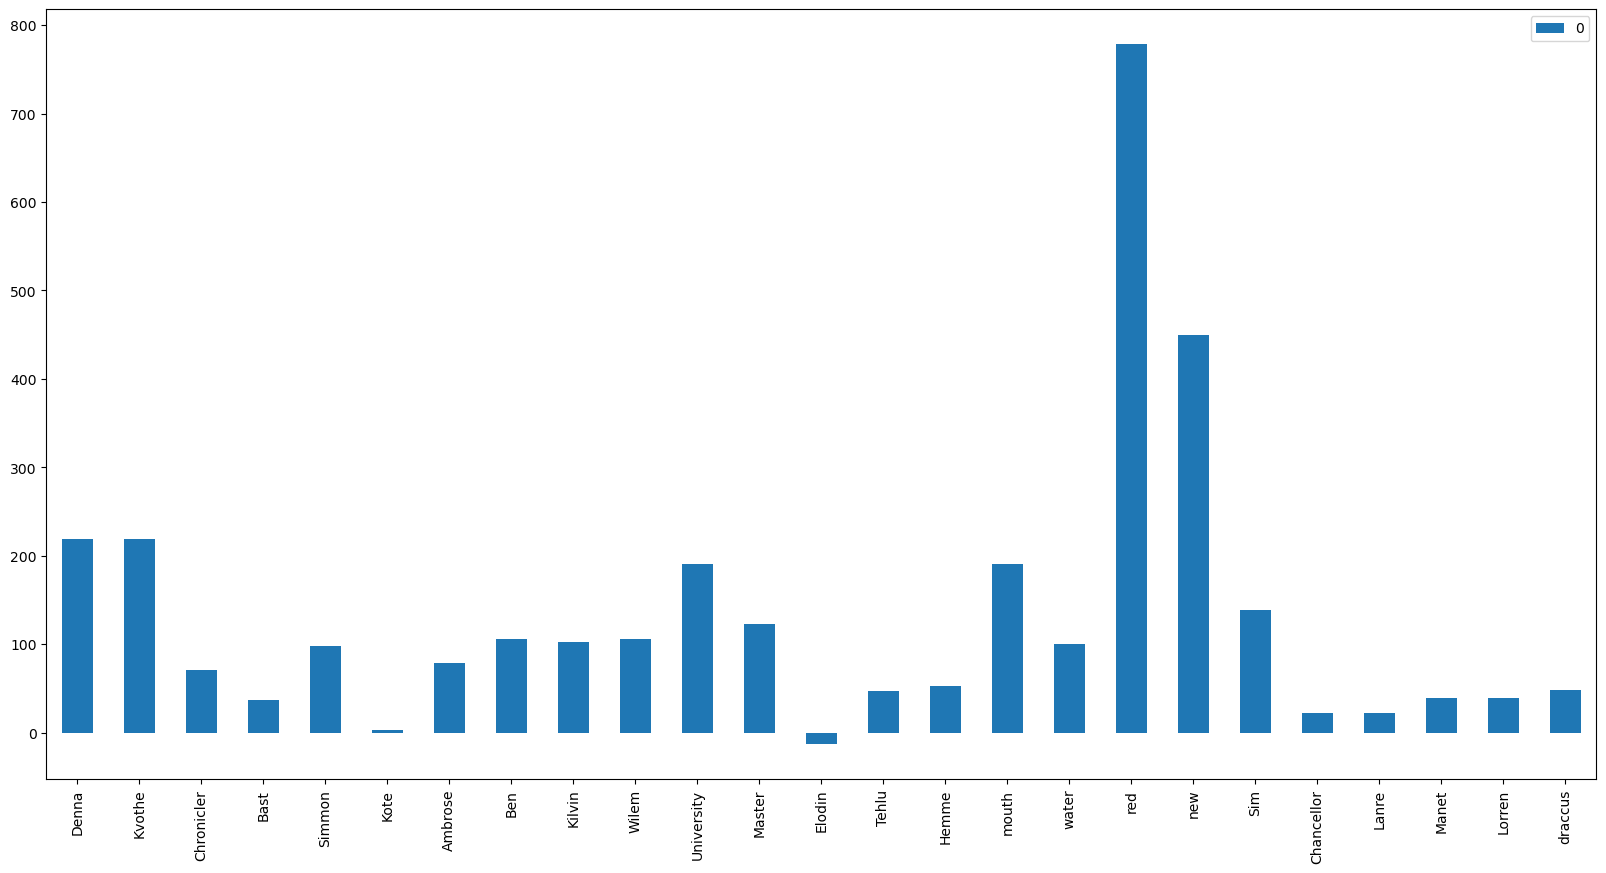

In [22]:
# plot a graph of the first 10 elements of the filtered dictionary and thier sid scores
# assuming the top 10 most repeated words are all characters, 
#this shows the sid of all important characters

df = pd.DataFrame.from_dict(char_index_tb, orient = 'index')

df.plot.bar(figsize = (20,10))

<AxesSubplot:>

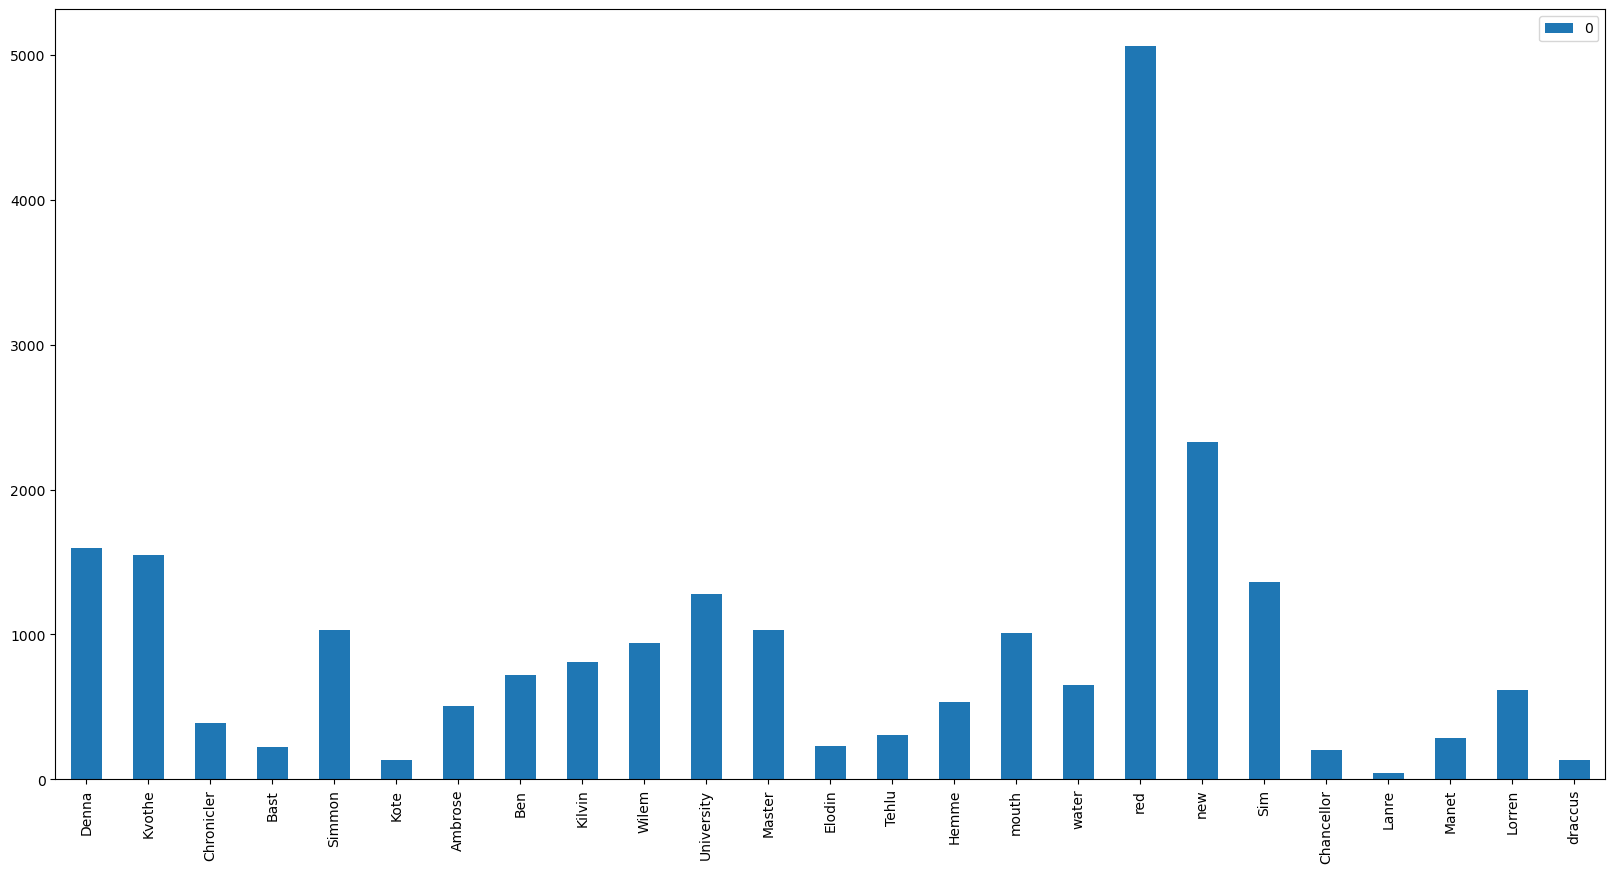

In [24]:
# plot a graph of the first 10 elements of the filtered dictionary and thier sid scores
# assuming the top 10 most repeated words are all characters, 
#this shows the sid of all important characters

df = pd.DataFrame.from_dict(char_index_sid, orient = 'index')


df.plot.bar(figsize = (20,10))

In [25]:
# create a function that records all the sid scores of the character along each sentences 
# throughout the book, essentially analysing the character development of the character
def char_sent(char):
    char_sent = []
    for sent in doc.sents:
        if char in sent.text:
            char_sent.append(sent.text)
    return char_sent

def char_dev(char):
    char_dev={}
    counter =0
    sents = char_sent(char)
    for sent in sents:
        csid = sid.polarity_scores(sent)
        char_dev[str(counter)] = csid['compound']
        counter +=1
    return char_dev

In [29]:
# show the character development of the character BAST
b_dev = char_dev('bast')

<AxesSubplot:title={'center':'CHARACTER DEVELOPMENT'}>

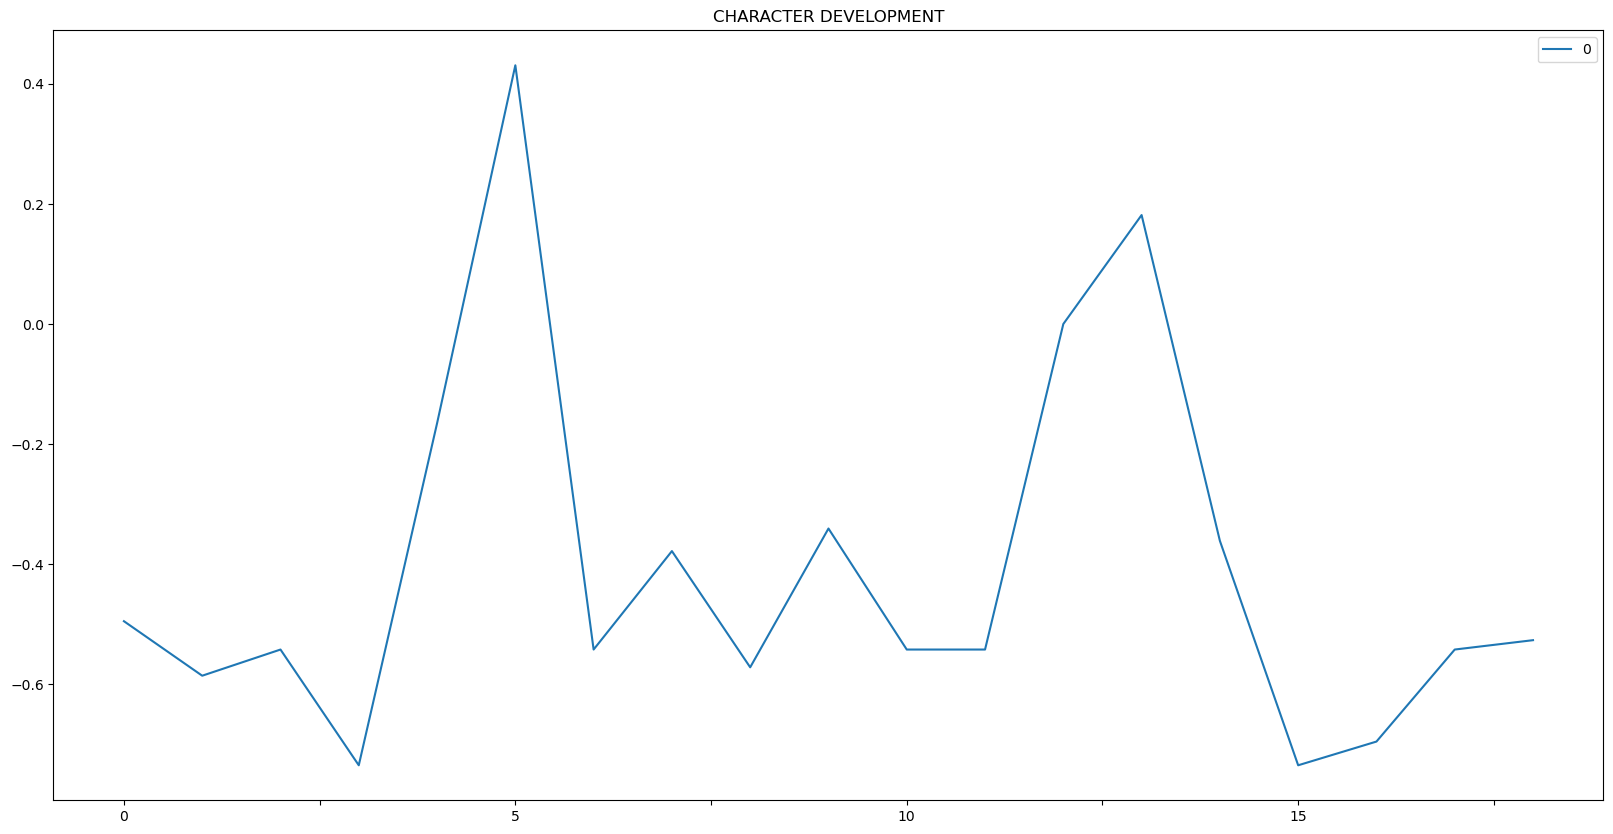

In [30]:
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(b_dev, orient = 'index')


df.plot.line(figsize = (20,10), title = 'BAST CHARACTER DEVELOPMENT')